# Exercícios Práticos: Ciência de Dados

#### Aplicação de conceitos básicos sobre:
- Estatística; 
- Probabilidade; 
- Classificação
- Regressão linear; 
- Regressão logística; 
- Árvores de decisão e correlação.  

#### Contexto da Pratica:

Você foi contratado como cientista de dados por uma empresa fictícia chamada HealthTech, que desenvolve soluções tecnológicas para o setor de saúde. A empresa está criando um novo aplicativo para ajudar médicos a prever o risco de doenças cardíacas em pacientes com base em diversos fatores de saúde. Para isso, você precisa aplicar conceitos fundamentais de estatística, probabilidade, classificação, regressão linear, regressão logística, árvores de decisão e correlação para analisar um conjunto de dados fictício.

---
#### Gerar dados

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Dados fictícios
dados = pd.DataFrame({
    'idade': np.random.randint(30, 80, 100),
    'sexo': np.random.randint(0, 2, 100),
    'pressao_arterial': np.random.randint(80, 160, 100),
    'colesterol': np.random.randint(150, 300, 100),
    'batimento_cardiaco': np.random.randint(60, 100, 100),
    'historico_familiar': np.random.randint(0, 2, 100),
    'exercicio_fisico': np.random.randint(0, 7, 100),
    'doenca_cardiaca': np.random.randint(0, 2, 100)
})

# Início das análises
print(dados.describe())

            idade        sexo  pressao_arterial  colesterol  \
count  100.000000  100.000000        100.000000  100.000000   
mean    56.010000    0.510000        120.630000  224.820000   
std     15.700798    0.502418         23.749388   41.907397   
min     30.000000    0.000000         81.000000  152.000000   
25%     43.000000    0.000000        100.000000  192.000000   
50%     54.000000    1.000000        119.500000  227.500000   
75%     71.250000    1.000000        144.250000  257.750000   
max     79.000000    1.000000        159.000000  297.000000   

       batimento_cardiaco  historico_familiar  exercicio_fisico  \
count          100.000000          100.000000        100.000000   
mean            80.080000            0.520000          3.450000   
std             11.224684            0.502117          1.961112   
min             60.000000            0.000000          0.000000   
25%             72.750000            0.000000          2.000000   
50%             79.000000     

---

### Estatística Descritiva:

- Calcular a média, mediana e moda para idade, pressao_arterial, e colesterol.
- Identificar os valores máximos e mínimos para cada variável numérica.


In [6]:
# Estatística descritiva
print("Média:")
print(dados[['idade', 'pressao_arterial', 'colesterol']].mean())

print("\nMediana:")
print(dados[['idade', 'pressao_arterial', 'colesterol']].median())

print("\nModa:")
print(dados[['idade', 'pressao_arterial', 'colesterol']].mode().iloc[0])

print("\nValores Máximos e Mínimos:")
print("Máximos:\n", dados[['idade', 'pressao_arterial', 'colesterol']].max())
print("Mínimos:\n", dados[['idade', 'pressao_arterial', 'colesterol']].min())


Média:
idade                56.01
pressao_arterial    120.63
colesterol          224.82
dtype: float64

Mediana:
idade                54.0
pressao_arterial    119.5
colesterol          227.5
dtype: float64

Moda:
idade                30.0
pressao_arterial    100.0
colesterol          247.0
Name: 0, dtype: float64

Valores Máximos e Mínimos:
Máximos:
 idade                79
pressao_arterial    159
colesterol          297
dtype: int64
Mínimos:
 idade                30
pressao_arterial     81
colesterol          152
dtype: int64


#### Probabilidade:

- Qual é a probabilidade de um paciente ter uma doença cardíaca se ele tiver um histórico familiar positivo?
- Estime a probabilidade de um paciente desenvolver doença cardíaca com base nos níveis de colesterol acima de um certo limite (defina um limite fictício).

In [7]:
# Probabilidade condicional
hist_fam_doenca = dados[(dados['historico_familiar'] == 1) & (dados['doenca_cardiaca'] == 1)].shape[0]
hist_fam_total = dados[dados['historico_familiar'] == 1].shape[0]

probabilidade = hist_fam_doenca / hist_fam_total
print(f"Probabilidade de ter doença cardíaca com histórico familiar positivo: {probabilidade:.2f}")


Probabilidade de ter doença cardíaca com histórico familiar positivo: 0.46


#### Regressão Linear:

- Crie um modelo de regressão linear para prever a pressão arterial com base na idade e no nível de colesterol.
- Interprete os coeficientes do modelo e avalie sua precisão.



In [8]:
from sklearn.metrics import accuracy_score

# Preparação dos dados
X = dados.drop('doenca_cardiaca', axis=1)
y = dados['doenca_cardiaca']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de árvore de decisão
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Previsão
y_pred = clf.predict(X_test)

# Avaliação
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")


Acurácia do modelo: 0.50


#### 4. Regressão Linear

Crie um modelo de regressão linear para prever a pressão arterial com base na idade e no nível de colesterol.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Regressão linear
X = dados[['idade', 'colesterol']]
y = dados['pressao_arterial']

reg = LinearRegression()
reg.fit(X, y)

y_pred = reg.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"Erro quadrático médio: {mse:.2f}")

# Coeficientes
print("Coeficientes:", reg.coef_)

Erro quadrático médio: 557.55
Coeficientes: [ 0.05622084 -0.00635936]


#### Regressão Logística:

- Utilize a regressão logística para prever a probabilidade de um paciente ter doença cardíaca com base em idade, colesterol e historico_familiar.
- Avalie a precisão do modelo e a significância das variáveis.

In [9]:
# Regressão logística
X = dados[['idade', 'colesterol', 'historico_familiar']]
y = dados['doenca_cardiaca']

logreg = LogisticRegression()
logreg.fit(X_train[['idade', 'colesterol', 'historico_familiar']], y_train)

# Previsão e avaliação
y_pred = logreg.predict(X_test[['idade', 'colesterol', 'historico_familiar']])
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia da regressão logística: {accuracy:.2f}")


Acurácia da regressão logística: 0.45


#### Árvores de Decisão e Correlação:

- Construa uma árvore de decisão para prever a doença cardíaca e compare com o modelo de regressão logística.
- Calcule a correlação entre idade, pressao_arterial e colesterol. Visualize a correlação usando um mapa de calor.

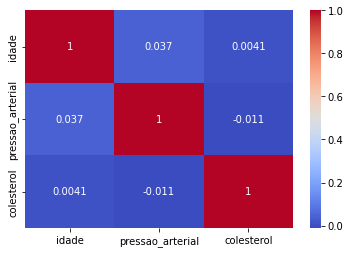

In [11]:
# Mapa de calor para correlação
correlacao = dados[['idade', 'pressao_arterial', 'colesterol']].corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.show()
